## **1 . Dicionário**

'ID_AREA' - 1 Capital - 2 interior

'ID_LOCALIZACAO' - 1 Urbana - 2 Rural

'PROFICIENCIA_MT_SAEB' - Proficiencia em matematica

'NU_TIPO_NIVEL_INSE' - Nivel INSE Aluno

'TX_RESP_Q01' - Sexo - A Masculino - B Feminino

'TX_RESP_Q02' - Idade - A 13 ou menos - B 14 - C 15 - D 16 - E 17 - F 18 ou mais

'TX_RESP_Q04' - Cor ou Raça - A Branca - B Preta - C Parda - D Amarela - E Indigena - F Não quero declarar

'TX_RESP_Q05' - Necessidade Especial - A Não - B Sim

'TX_RESP_Q07' - Escolaridade Mãe - A Não completo 5º - B Até o 5º - C Fundamental Completo - D Médio Completo - E Superior - F Não sei

'TX_RESP_Q08' - Escolaridade Pai - A Não completo 5º - B Até o 5º - C Fundamental Completo - D Médio Completo - E Superior - F Não sei

'TX_RESP_Q09b' - Pais conversam sobre o que acontece na escola - A Nunca ou quase nunca - B De vez enquanto - C Sempre ou quase

'TX_RESP_Q09c' - Pais incentiva a estudar - A Nunca ou quase nunca - B De vez enquanto - C Sempre ou quase

'TX_RESP_Q09d' - Pais incentiva a fazer tarefa - A Nunca ou quase nunca - B De vez enquanto - C Sempre ou quase

'TX_RESP_Q09e' - Pais incentiva a ir a aula - A Nunca ou quase nunca - B De vez enquanto - C Sempre ou quase

'TX_RESP_Q09f' - Pais vão a reunião - A Nunca ou quase nunca - B De vez enquanto - C Sempre ou quase

'TX_RESP_Q10a' - Onde mora tem asfalto/calçamento - A Não - B Sim

'TX_RESP_Q10b' - Onde mora tem agua tratada - A Não - B Sim

'TX_RESP_Q10c' - Onde mora tem iluminação - A Não - B Sim

'TX_RESP_Q13' - Tempo pra chegar na escola - A Menos de 30min - B Entre 30 min e 1 hora - C Mais de uma hora

'TX_RESP_Q14' - A maior distancia vai pra escola de - A À pé - B Bicicleta - C Van - D Ônibus - E Metro ou trem - F Carro - G Outros

'TX_RESP_Q15' - Utiliza transporte escolar - A Não - B Sim

'TX_RESP_Q16' - Idade entrou na escola - A 3 ou menos - B 4 ou 5 - C 6 ou 7 - D 8 ou mais

'TX_RESP_Q17' - Apartir de 1º, qual tipo de escola estudou - A Somente publica - B Somente particular - C Em escola publica e particular

'TX_RESP_Q18' - já foi reprovado - A Não - B Uma Vez - C Duas vezes ou mais

'TX_RESP_Q19' - Abandonou a escola até o final do ano - A Nunca - B Uma Vez - C Duas vezes ou mais

'TX_RESP_Q20a' - Tempo pra estudar - A Não uso meu tempo pra isso - B Menos de uma hora - C Entre 1 e 2 horas - D Mais de 2 horas

'TX_RESP_Q20b' - Tempo pra fazer cursos - A Não uso meu tempo pra isso - B Menos de uma hora - C Entre 1 e 2 horas - D Mais de 2 horas

'TX_RESP_Q20c' - Tempo pra trabalhar em casa - A Não uso meu tempo pra isso - B Menos de uma hora - C Entre 1 e 2 horas - D Mais de 2 horas

'TX_RESP_Q20d' - Tempo pra trabalhar fora de casa - A Não uso meu tempo pra isso - B Menos de uma hora - C Entre 1 e 2 horas - D Mais de 2 horas

'TX_RESP_Q20e' - Tempo para lazer - A Não uso meu tempo pra isso - B Menos de uma hora - C Entre 1 e 2 horas - D Mais de 2 horas

## **2 . Preparação dos Dados**

In [ ]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import scipy.stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [ ]:
import gdown
import pandas as pd

file_id = "18rbfY-O9XFEPhtKY_3t5bQWhcYHBRTJK"

url = f"https://drive.google.com/uc?export=download&id={file_id}"

output = '/content/arquivo.csv'
gdown.download(url, output, quiet=False)

import os
print(os.listdir('/content/'))

df = pd.read_csv(output, delimiter=';')

saeb = df.copy()

Downloading...
From (original): https://drive.google.com/uc?export=download&id=18rbfY-O9XFEPhtKY_3t5bQWhcYHBRTJK
From (redirected): https://drive.google.com/uc?export=download&id=18rbfY-O9XFEPhtKY_3t5bQWhcYHBRTJK&confirm=t&uuid=cfde4fcb-c8ef-4d54-885f-9df12926df70
To: /content/arquivo.csv
100%|██████████| 600M/600M [00:06<00:00, 99.7MB/s]


['.config', 'arquivo.csv', 'sample_data']


In [ ]:
colunasSelecionadas = ['ID_REGIAO','ID_AREA','IN_PUBLICA','ID_LOCALIZACAO','IN_PROFICIENCIA_MT','PROFICIENCIA_MT_SAEB','IN_INSE','NU_TIPO_NIVEL_INSE','TX_RESP_Q01','TX_RESP_Q02','TX_RESP_Q04','TX_RESP_Q05','TX_RESP_Q07','TX_RESP_Q08','TX_RESP_Q09a','TX_RESP_Q09b','TX_RESP_Q09c','TX_RESP_Q09d','TX_RESP_Q09e','TX_RESP_Q09f','TX_RESP_Q10a','TX_RESP_Q10b', 'TX_RESP_Q10c','TX_RESP_Q13','TX_RESP_Q14','TX_RESP_Q15','TX_RESP_Q16','TX_RESP_Q17','TX_RESP_Q18','TX_RESP_Q19','TX_RESP_Q20a','TX_RESP_Q20b','TX_RESP_Q20c','TX_RESP_Q20d','TX_RESP_Q20e']
saeb_mt = saeb.filter(items=colunasSelecionadas)
saeb_mt = saeb_mt[(saeb_mt['IN_PROFICIENCIA_MT'] == 1) & (saeb_mt['IN_PUBLICA'] == 1)].copy()
saeb_mt['PROFICIENCIA_MT_SAEB'] = saeb_mt['PROFICIENCIA_MT_SAEB'].astype(float)
saeb_mt = saeb_mt.drop('IN_PUBLICA', axis=1)
saeb_mt = saeb_mt.drop('IN_PROFICIENCIA_MT', axis=1)

In [ ]:
linhas_validas= saeb_mt.shape[0]
print(f'Linhas base(Notas válidas e Escola Pública): {linhas_validas}.')

linhas_totais= saeb.shape[0]
print(f'Linhas Totais: {linhas_totais}.')

linhas_invalidas = saeb.shape[0] - linhas_validas
print(f'Linhas Invalidas: {linhas_invalidas}.')

Linhas base(Notas válidas e Escola Pública): 1886179.
Linhas Totais: 2591937.
Linhas Invalidas: 705758.


## **3.1  Colunas (Classificação em 4 Classes(Insuficiente, Básico, Proficiente, Avançado) - "df")**

In [ ]:
bins = [-float('inf'), 200, 225, 250, 275, 300, 325, 350, 375, 400, float('inf')]
labels_numericos = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
labels_proficiencia = [
    'Insuficiente',  # Nível 0 e 1 (0-224 pts)
    'Básico',        # Nível 2, 3 e 4 (225-299 pts)
    'Proficiente',   # Nível 5 e 6 (300-349 pts)
    'Avançado'       # Nível 7, 8 e 9 (350+ pts)
]

saeb_mt['NIVEL_PROFICIENCIA'] = pd.cut(saeb_mt['PROFICIENCIA_MT_SAEB'], bins=bins, labels=labels_numericos, right=False)

nivel_to_proficiencia = {0: 'Insuficiente', 1: 'Insuficiente', 2: 'Básico', 3: 'Básico', 4: 'Básico',
                         5: 'Proficiente', 6: 'Proficiente', 7: 'Avançado', 8: 'Avançado', 9: 'Avançado'}

saeb_mt['PROFICIENCIA_DESCRICAO'] = saeb_mt['NIVEL_PROFICIENCIA'].map(nivel_to_proficiencia)

colunas = [
    'ID_AREA','ID_REGIAO','IN_INSE', 'ID_LOCALIZACAO', 'TX_RESP_Q01', 'TX_RESP_Q02', 'TX_RESP_Q04', 'TX_RESP_Q05', 'NU_TIPO_NIVEL_INSE',
    'TX_RESP_Q07', 'TX_RESP_Q08','TX_RESP_Q09a', 'TX_RESP_Q09b', 'TX_RESP_Q09c',
    'TX_RESP_Q09d', 'TX_RESP_Q09e', 'TX_RESP_Q09f', 'TX_RESP_Q10a',
    'TX_RESP_Q10b', 'TX_RESP_Q10c', 'TX_RESP_Q13', 'TX_RESP_Q14',
    'TX_RESP_Q15', 'TX_RESP_Q16', 'TX_RESP_Q17', 'TX_RESP_Q18',
    'TX_RESP_Q19', 'TX_RESP_Q20a', 'TX_RESP_Q20b', 'TX_RESP_Q20c',
    'TX_RESP_Q20d', 'TX_RESP_Q20e', 'PROFICIENCIA_DESCRICAO'
]

df = saeb_mt[colunas]

df.head()

,ID_AREA,ID_REGIAO,IN_INSE,ID_LOCALIZACAO,TX_RESP_Q01,TX_RESP_Q02,TX_RESP_Q04,TX_RESP_Q05,NU_TIPO_NIVEL_INSE,TX_RESP_Q07,...,TX_RESP_Q16,TX_RESP_Q17,TX_RESP_Q18,TX_RESP_Q19,TX_RESP_Q20a,TX_RESP_Q20b,TX_RESP_Q20c,TX_RESP_Q20d,TX_RESP_Q20e,PROFICIENCIA_DESCRICAO
0,2,1,1,1,A,B,A,B,4,D,...,A,A,A,A,C,B,D,D,B,Básico
1,2,1,1,1,A,E,C,B,5,F,...,B,C,C,A,B,D,D,D,C,Insuficiente
4,2,1,1,1,B,B,A,B,4,B,...,C,A,.,A,B,*,A,A,D,Insuficiente
5,2,1,1,1,B,E,C,B,4,F,...,B,A,B,A,C,*,B,B,B,Insuficiente
6,2,1,1,1,B,C,D,B,3,F,...,C,A,A,A,B,B,C,D,D,Básico


In [ ]:
# Verificando a distribuição das classes após o replace
class_distribution = df['PROFICIENCIA_DESCRICAO'].value_counts()

# Total de registros no dataframe
total_records = len(df)

print("Distribuição de registros no dataframe `df_filtered`:")
for classe, quantidade in class_distribution.items():
    porcentagem = (quantidade / total_records) * 100
    print(f"Classe {classe}: {quantidade} registros ({porcentagem:.2f}%)")

# Verificando se a soma total bate
print(f"\nSoma total de registros: {class_distribution.sum()} (Esperado: {total_records})")


Distribuição de registros no dataframe `df_filtered`:
Classe Básico: 1016289 registros (53.88%)
Classe Insuficiente: 568456 registros (30.14%)
Classe Proficiente: 270539 registros (14.34%)
Classe Avançado: 30895 registros (1.64%)

Soma total de registros: 1886179 (Esperado: 1886179)


## **3.2  Colunas (Classificação em 2 Classes(Insuficiente, Proficiente) + Colunas Selecionadas - "df_filtered")**

In [ ]:
# Verificando a distribuição das classes após o replace
class_distribution = df['PROFICIENCIA_DESCRICAO'].value_counts()

# Total de registros no dataframe
total_records = len(df)

print("Distribuição de registros no dataframe `df_filtered`:")
for classe, quantidade in class_distribution.items():
    porcentagem = (quantidade / total_records) * 100
    print(f"Classe {classe}: {quantidade} registros ({porcentagem:.2f}%)")

# Verificando se a soma total bate
print(f"\nSoma total de registros: {class_distribution.sum()} (Esperado: {total_records})")

Distribuição de registros no dataframe `df_filtered`:
Classe Básico: 1016289 registros (53.88%)
Classe Insuficiente: 568456 registros (30.14%)
Classe Proficiente: 270539 registros (14.34%)
Classe Avançado: 30895 registros (1.64%)

Soma total de registros: 1886179 (Esperado: 1886179)


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Supondo que seu dataframe filtrado seja chamado df_filtered
df1 = df.copy()

# Separar variável alvo e preditoras
# Neste exemplo, usamos a coluna 'PROFICIENCIA_DESCRICAO' como alvo
X = df1.drop("PROFICIENCIA_DESCRICAO", axis=1)
y = df1["PROFICIENCIA_DESCRICAO"]

# Converter variáveis categóricas em dummies (one-hot encoding)
# Caso existam variáveis numéricas, elas serão mantidas
X = pd.get_dummies(X, drop_first=True)

# Se a variável alvo for categórica, fazemos a codificação para números
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Dividir a base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Treinar a árvore de decisão CART
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Obter as importâncias de cada feature
importances = clf.feature_importances_
features_names = X.columns

# Criar um DataFrame para visualizar as importâncias e ordená-las
feat_importances = pd.DataFrame({'questao': features_names, 'importancia': importances})
feat_importances = feat_importances.sort_values(by='importancia', ascending=False)

print("Lista das questões mais importantes:")
print(feat_importances)


Lista das questões mais importantes:
                  questao  importancia
1               ID_REGIAO     0.037018
104         TX_RESP_Q18_A     0.027747
0                 ID_AREA     0.016772
96          TX_RESP_Q16_B     0.016697
28   NU_TIPO_NIVEL_INSE_5     0.016213
..                    ...          ...
4           TX_RESP_Q01_.     0.000792
7           TX_RESP_Q02_.     0.000765
2                 IN_INSE     0.000744
131        TX_RESP_Q20e_.     0.000600
88          TX_RESP_Q14_E     0.000325

[136 rows x 2 columns]


In [ ]:
colunas_selecionadas = ['IN_INSE', 'TX_RESP_Q18','TX_RESP_Q02','TX_RESP_Q07','TX_RESP_Q20e','TX_RESP_Q08','NU_TIPO_NIVEL_INSE','TX_RESP_Q04','PROFICIENCIA_DESCRICAO','ID_REGIAO','TX_RESP_Q01','TX_RESP_Q10b','TX_RESP_Q20a','TX_RESP_Q19','TX_RESP_Q10a','TX_RESP_Q14','ID_LOCALIZACAO']

df_filtered = df[colunas_selecionadas].copy()

# Filtrando para IN_INSE == 1
df_filtered = df_filtered[df_filtered['IN_INSE'] == 1].copy()

# Tratamento de valores ausentes e substituição
df_filtered['NU_TIPO_NIVEL_INSE'].replace(['', ' ', '               '], np.nan)
df_filtered.dropna(subset=['NU_TIPO_NIVEL_INSE'])

# Limpeza de respostas
colunas_respostas = ['TX_RESP_Q18','TX_RESP_Q02','TX_RESP_Q07','TX_RESP_Q20e','TX_RESP_Q08','NU_TIPO_NIVEL_INSE','TX_RESP_Q04','ID_REGIAO','TX_RESP_Q01','TX_RESP_Q10b','TX_RESP_Q20a','TX_RESP_Q19','TX_RESP_Q10a','TX_RESP_Q14','ID_LOCALIZACAO']

for coluna in colunas_respostas:
    df_filtered = df_filtered[~df_filtered[coluna].isin(['.', '*'])]
    df_filtered[coluna].replace(['', ' ', '               '], np.nan)
    df_filtered.dropna(subset=[coluna])

# Ajustando a variável 'PROFICIENCIA_DESCRICAO'
df_filtered['PROFICIENCIA_DESCRICAO'] = df_filtered['PROFICIENCIA_DESCRICAO'].replace({
    'Básico': 'Insuficiente',
    'Insuficiente': 'Insuficiente',
    'Proficiente': 'Proficiente',
    'Avançado': 'Proficiente'
})

# Removendo a coluna IN_INSE e dividindo as variáveis independentes (X) e dependentes (y)
df_filtered = df_filtered.drop(columns=['IN_INSE'])

linhas_validas= df_filtered.shape[0]
print(f'Linhas base(Retirados Valores Nulos, . e *): {linhas_validas}.')

linhas_totais= df.shape[0]
print(f'Linhas Totais: {linhas_totais}.')

linhas_invalidas = df.shape[0] - linhas_validas
print(f'Linhas Invalidas: {linhas_invalidas}.')

# Calculando a porcentagem de remoção
percent_remocao = (linhas_invalidas / linhas_totais) * 100

# Exibindo o resultado
print(f"Porcentagem de remoção de linhas: {percent_remocao:.2f}%")

df_filtered.head()



Linhas base(Retirados Valores Nulos, . e *): 1524217.
Linhas Totais: 1886179.
Linhas Invalidas: 361962.
Porcentagem de remoção de linhas: 19.19%


,TX_RESP_Q18,TX_RESP_Q02,TX_RESP_Q07,TX_RESP_Q20e,TX_RESP_Q08,NU_TIPO_NIVEL_INSE,TX_RESP_Q04,PROFICIENCIA_DESCRICAO,ID_REGIAO,TX_RESP_Q01,TX_RESP_Q10b,TX_RESP_Q20a,TX_RESP_Q19,TX_RESP_Q10a,TX_RESP_Q14,ID_LOCALIZACAO
0,A,B,D,B,F,4,A,Insuficiente,1,A,A,C,A,A,D,1
1,C,E,F,C,F,5,C,Insuficiente,1,A,B,B,A,A,D,1
6,A,C,F,D,F,3,D,Insuficiente,1,B,A,B,A,A,A,1
7,A,C,C,B,B,3,A,Insuficiente,1,B,A,D,A,A,D,1
8,B,D,E,D,F,4,C,Insuficiente,1,A,B,D,A,A,D,1


In [ ]:
# Verificando a distribuição das classes após o replace
class_distribution = df_filtered['PROFICIENCIA_DESCRICAO'].value_counts()

# Total de registros no dataframe
total_records = len(df_filtered)

print("Distribuição de registros no dataframe `df_filtered`:")
for classe, quantidade in class_distribution.items():
    porcentagem = (quantidade / total_records) * 100
    print(f"Classe {classe}: {quantidade} registros ({porcentagem:.2f}%)")

# Verificando se a soma total bate
print(f"\nSoma total de registros: {class_distribution.sum()} (Esperado: {total_records})")


Distribuição de registros no dataframe `df_filtered`:
Classe Insuficiente: 1254938 registros (82.33%)
Classe Proficiente: 269279 registros (17.67%)

Soma total de registros: 1524217 (Esperado: 1524217)


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1524217 entries, 0 to 2591705
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   TX_RESP_Q18             1524217 non-null  object
 1   TX_RESP_Q02             1524217 non-null  object
 2   TX_RESP_Q07             1524217 non-null  object
 3   TX_RESP_Q20e            1524217 non-null  object
 4   TX_RESP_Q08             1524217 non-null  object
 5   NU_TIPO_NIVEL_INSE      1524217 non-null  object
 6   TX_RESP_Q04             1524217 non-null  object
 7   PROFICIENCIA_DESCRICAO  1524217 non-null  object
 8   ID_REGIAO               1524217 non-null  int64 
 9   TX_RESP_Q01             1524217 non-null  object
 10  TX_RESP_Q10b            1524217 non-null  object
 11  TX_RESP_Q20a            1524217 non-null  object
 12  TX_RESP_Q19             1524217 non-null  object
 13  TX_RESP_Q10a            1524217 non-null  object
 14  TX_RESP_Q14            

## **Análise Exploratoria**

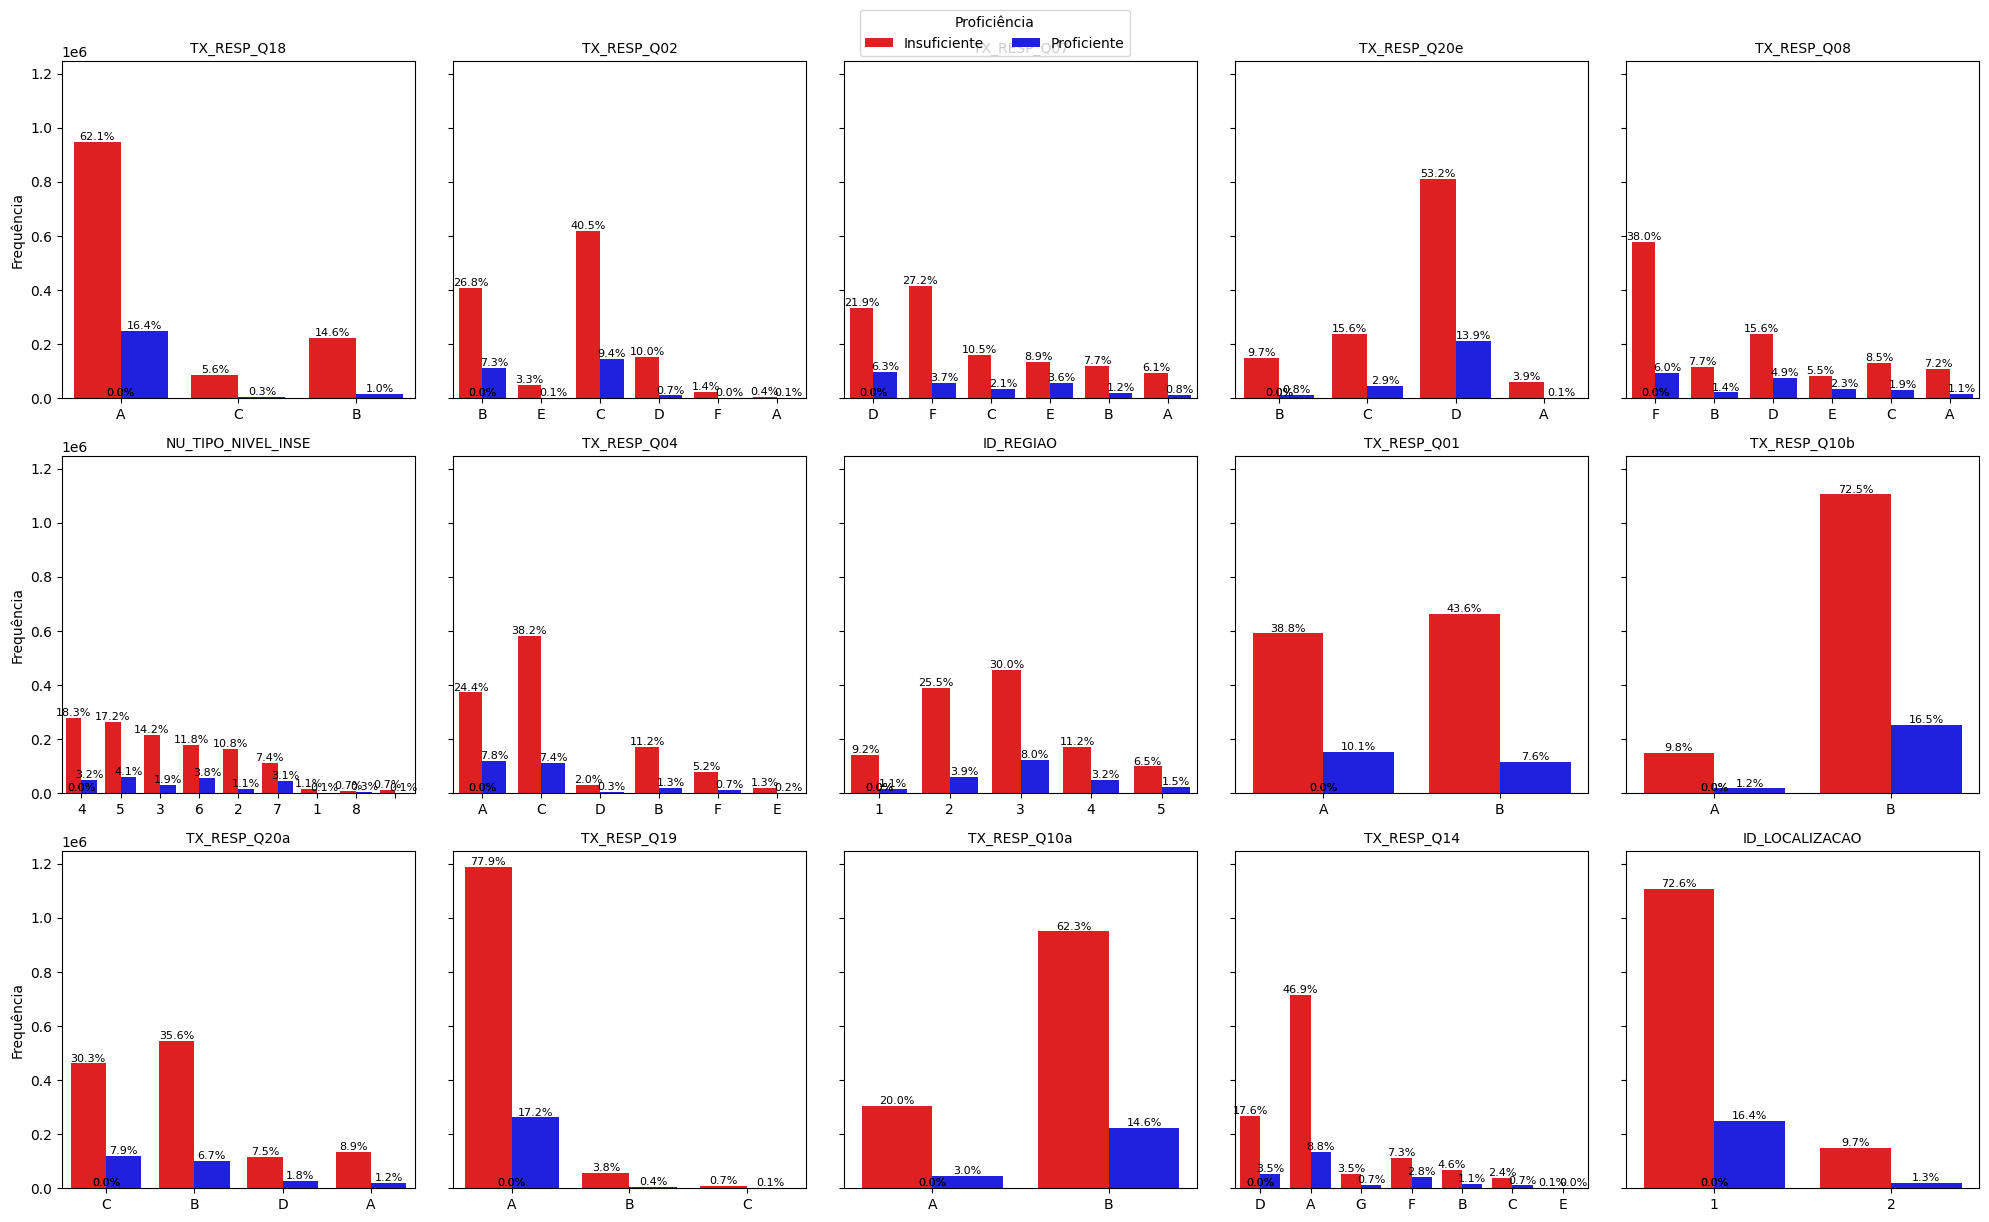

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de colunas que desejamos plotar
cols = ['TX_RESP_Q18', 'TX_RESP_Q02', 'TX_RESP_Q07', 'TX_RESP_Q20e', 'TX_RESP_Q08',
        'NU_TIPO_NIVEL_INSE', 'TX_RESP_Q04', 'ID_REGIAO', 'TX_RESP_Q01', 'TX_RESP_Q10b',
        'TX_RESP_Q20a', 'TX_RESP_Q19', 'TX_RESP_Q10a', 'TX_RESP_Q14', 'ID_LOCALIZACAO']

# Configurar a grade de subplots (3 linhas x 5 colunas para 15 gráficos)
n_rows = 3
n_cols = 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12), sharey=True)
axes = axes.flatten()  # Facilita a indexação dos subplots

# Loop para criar cada countplot e adicionar os valores percentuais
for i, col in enumerate(cols):
    ax = axes[i]
    sns.countplot(
        data=df_filtered,
        x=col,
        hue='PROFICIENCIA_DESCRICAO',
        ax=ax,
        palette={'Insuficiente': 'red', 'Proficiente': 'blue'}
    )
    ax.set_title(col, fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('Frequência')

    # Calcular o total de contagens do subplot para calcular porcentagens
    total = sum([patch.get_height() for patch in ax.patches])

    # Adicionar o texto com a porcentagem em cima de cada barra
    for patch in ax.patches:
        height = patch.get_height()
        percent = (height / total * 100) if total > 0 else 0
        ax.text(patch.get_x() + patch.get_width()/2, height, f'{percent:.1f}%',
                ha='center', va='bottom', fontsize=8)

# Remover legendas individuais de cada subplot
for ax in axes:
    ax.legend().remove()

# Criar uma única legenda para toda a figura
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Proficiência', loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=2)

plt.tight_layout()
plt.show()


## **4 Regressão Logística - sem balancear - Statsmodels**

Optimization terminated successfully.
         Current function value: 0.416601
         Iterations 8
                             Logit Regression Results                             
Dep. Variable:     PROFICIENCIA_DESCRICAO   No. Observations:              1219373
Model:                              Logit   Df Residuals:                  1219323
Method:                               MLE   Df Model:                           49
Date:                    Wed, 26 Mar 2025   Pseudo R-squ.:                  0.1063
Time:                            21:10:05   Log-Likelihood:            -5.0799e+05
converged:                           True   LL-Null:                   -5.6843e+05
Covariance Type:                nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.3970      0.056    -61.036   

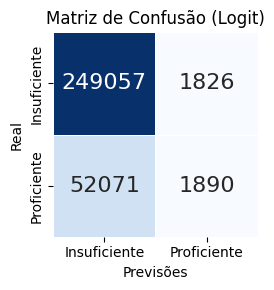

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Preparando os dados
X = pd.get_dummies(df_filtered.drop(columns=['PROFICIENCIA_DESCRICAO']), drop_first=True)
y = df_filtered['PROFICIENCIA_DESCRICAO'].map({'Insuficiente': 0, 'Proficiente': 1})  # Mapeia as classes para 0 e 1

# Adicionando uma constante (intercepto) ao conjunto de variáveis independentes
X = sm.add_constant(X)

# Garantindo que as variáveis sejam do tipo inteiro
X = X.astype(int)
y = y.astype(int)

# Divisão dos dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustando o modelo de regressão logística
log_reg = sm.Logit(y_train, X_train).fit()

# Exibindo o resumo do modelo
print(log_reg.summary())

# Extraindo os coeficientes, odds ratios e p-values
coefficients = log_reg.params
odds_ratios = np.exp(coefficients)  # Odds ratios calculados como exp(coeficiente)
p_values = log_reg.pvalues

# Apresentando os resultados em um DataFrame
results = pd.DataFrame({
    'Feature': coefficients.index,
    'Coefficient': coefficients.values,
    'Odds Ratio': odds_ratios.values,
    'p-value': p_values.values
}).sort_values(by='Odds Ratio', ascending=False)

print("\nCoeficientes, Odds Ratios e p-values do Modelo:")
print(results)

# Previsões no conjunto de teste
y_pred = (log_reg.predict(X_test) > 0.5).astype(int)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Insuficiente', 'Proficiente']))

# Gerando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão com os nomes das classes
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            annot_kws={"size": 16}, xticklabels=['Insuficiente', 'Proficiente'],
            yticklabels=['Insuficiente', 'Proficiente'], linewidths=0.5)

# Adicionando título e rótulos
plt.xlabel("Previsões")
plt.ylabel("Real")
plt.title("Matriz de Confusão (Logit)")
plt.tight_layout()
plt.show()



Acurácia no treino: 0.8240

Classification Report (Treino):
              precision    recall  f1-score   support

Insuficiente       0.83      0.99      0.90   1004055
 Proficiente       0.52      0.03      0.07    215318

    accuracy                           0.82   1219373
   macro avg       0.68      0.51      0.48   1219373
weighted avg       0.77      0.82      0.75   1219373



<Figure size 500x300 with 0 Axes>

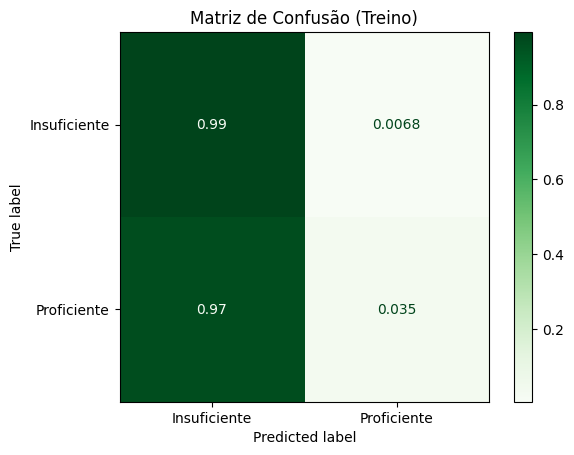


Acurácia no teste: 0.8232

Classification Report (Teste):
              precision    recall  f1-score   support

Insuficiente       0.83      0.99      0.90    250883
 Proficiente       0.51      0.04      0.07     53961

    accuracy                           0.82    304844
   macro avg       0.67      0.51      0.48    304844
weighted avg       0.77      0.82      0.75    304844



<Figure size 500x300 with 0 Axes>

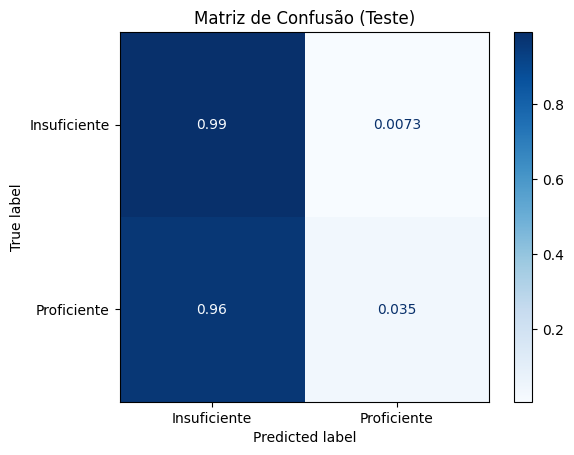

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Função para plotar matriz de confusão normalizada
def plot_confusion_matrix(y_true, y_pred, title, xticklabels, yticklabels, cmap, fig_size=(5, 3)):
    plt.figure(figsize=fig_size)
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true, y_pred,
        display_labels=[xticklabels, yticklabels],
        cmap=cmap,
        normalize='true'  # Normaliza por linha (percentual por classe real)
    )
    plt.title(title)
    plt.show()

# Previsões e avaliação no conjunto de treino
y_train_pred = (log_reg.predict(X_train) > 0.5).astype(int)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nAcurácia no treino: {train_accuracy:.4f}")
print("\nClassification Report (Treino):")
print(classification_report(y_train, y_train_pred, target_names=['Insuficiente', 'Proficiente']))

# Plot da matriz de confusão para treino
plot_confusion_matrix(y_train, y_train_pred,
                      title="Matriz de Confusão (Treino)",
                      xticklabels='Insuficiente',
                      yticklabels='Proficiente',
                      cmap="Greens")

# Previsões e avaliação no conjunto de teste
y_test_pred = (log_reg.predict(X_test) > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nAcurácia no teste: {test_accuracy:.4f}")
print("\nClassification Report (Teste):")
print(classification_report(y_test, y_test_pred, target_names=['Insuficiente', 'Proficiente']))

# Plot da matriz de confusão para teste
plot_confusion_matrix(y_test, y_test_pred,
                      title="Matriz de Confusão (Teste)",
                      xticklabels='Insuficiente',
                      yticklabels='Proficiente',
                      cmap="Blues")


In [ ]:
# Contando os registros por classe no dataset completo
class_counts = y.value_counts()
total_records = len(y)

print("Distribuição de registros por classe no dataset completo:")
for classe, quantidade in class_counts.items():
    classe_nome = 'Proficiente' if classe == 1 else 'Insuficiente'
    porcentagem = (quantidade / total_records) * 100
    print(f"Classe {classe_nome}: {quantidade} registros ({porcentagem:.2f}%)")


Distribuição de registros por classe no dataset completo:
Classe Insuficiente: 1254938 registros (82.33%)
Classe Proficiente: 269279 registros (17.67%)


## **4 Regressão Logística - undersampling - Statsmodels**

Distribuição das classes antes do balanceamento:
PROFICIENCIA_DESCRICAO
0    1004055
1     215318
Name: count, dtype: int64

Porcentagem das classes antes do balanceamento:
PROFICIENCIA_DESCRICAO
0    82.341909
1    17.658091
Name: proportion, dtype: float64

Distribuição das classes após o balanceamento com Undersampling:
PROFICIENCIA_DESCRICAO
0    215318
1    215318
Name: count, dtype: int64

Porcentagem das classes após o balanceamento com Undersampling:
PROFICIENCIA_DESCRICAO
0    50.0
1    50.0
Name: proportion, dtype: float64
Optimization terminated successfully.
         Current function value: 0.606807
         Iterations 6

Acurácia: 0.6400

Classification Report:
              precision    recall  f1-score   support

Insuficiente       0.91      0.62      0.74    250883
 Proficiente       0.29      0.72      0.41     53961

    accuracy                           0.64    304844
   macro avg       0.60      0.67      0.58    304844
weighted avg       0.80      0.64      0.68  

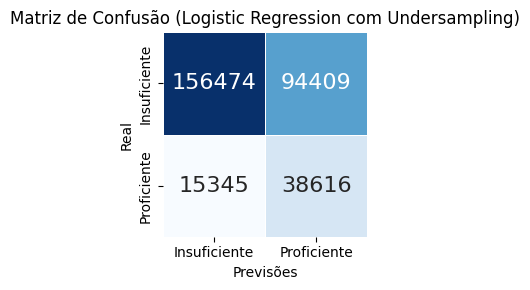


Coeficientes, Odds Ratios e p-values do Modelo de Regressão Logística com Undersampling:
                 Feature  Coefficient  Odds Ratio        p-value
17        TX_RESP_Q20e_D     1.379507    3.972942   0.000000e+00
16        TX_RESP_Q20e_C     1.132058    3.102035   0.000000e+00
40        TX_RESP_Q20a_D     0.579243    1.784686  3.116139e-287
15        TX_RESP_Q20e_B     0.559891    1.750481   1.730953e-73
39        TX_RESP_Q20a_C     0.539064    1.714402   0.000000e+00
30  NU_TIPO_NIVEL_INSE_8     0.439453    1.551858   4.682403e-19
29  NU_TIPO_NIVEL_INSE_7     0.435159    1.545209   2.640694e-28
13         TX_RESP_Q07_E     0.393036    1.481472  3.873271e-107
45         TX_RESP_Q14_C     0.361746    1.435835   2.449631e-80
28  NU_TIPO_NIVEL_INSE_6     0.351697    1.421478   2.038998e-19
48         TX_RESP_Q14_F     0.318642    1.375259  2.187260e-179
12         TX_RESP_Q07_D     0.283664    1.327987   4.705522e-69
37        TX_RESP_Q10b_B     0.269155    1.308858  1.754558e-102


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Transformando as variáveis categóricas em numéricas usando One-Hot Encoding
X = pd.get_dummies(df_filtered.drop(columns=['PROFICIENCIA_DESCRICAO']), drop_first=True)

# Mapeando as classes para 0 e 1
y = df_filtered['PROFICIENCIA_DESCRICAO'].map({'Insuficiente': 0, 'Proficiente': 1})

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Garantindo que os dados de entrada são do tipo float para evitar erros
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Exibindo a quantidade e porcentagem das classes antes do balanceamento
print("Distribuição das classes antes do balanceamento:")
print(y_train.value_counts())
print("\nPorcentagem das classes antes do balanceamento:")
print(y_train.value_counts(normalize=True) * 100)

# Aplicando RandomUnderSampler para balancear as classes no conjunto de treinamento
undersampler = RandomUnderSampler(random_state=42)
X_train_undersample, y_train_undersample = undersampler.fit_resample(X_train, y_train)

# Exibindo a quantidade e porcentagem das classes após o balanceamento
print("\nDistribuição das classes após o balanceamento com Undersampling:")
print(y_train_undersample.value_counts())
print("\nPorcentagem das classes após o balanceamento com Undersampling:")
print(y_train_undersample.value_counts(normalize=True) * 100)

# Adicionando a constante (intercepto) para o modelo statsmodels
X_train_undersample = sm.add_constant(X_train_undersample)
X_test = sm.add_constant(X_test)

# Ajustando o modelo de regressão logística com statsmodels
log_reg_stats = sm.Logit(y_train_undersample, X_train_undersample).fit()

# Previsões no conjunto de teste
y_pred = (log_reg_stats.predict(X_test) > 0.5).astype(int)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Insuficiente', 'Proficiente']))

# Gerando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            annot_kws={"size": 16}, xticklabels=['Insuficiente', 'Proficiente'],
            yticklabels=['Insuficiente', 'Proficiente'], linewidths=0.5)

# Adicionando título e rótulos
plt.xlabel("Previsões")
plt.ylabel("Real")
plt.title("Matriz de Confusão (Logistic Regression com Undersampling)")
plt.tight_layout()
plt.show()

# Coeficientes do modelo
coef = log_reg_stats.params
features = ['Intercept'] + list(X.columns)  # Inclui o intercepto no nome das variáveis

# Calculando as Odds Ratios
odds_ratios = np.exp(coef)

# Calculando os p-values
p_values = log_reg_stats.pvalues

# Criando o DataFrame para exibir os coeficientes, Odds Ratios e p-values
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coef.values,
    'Odds Ratio': odds_ratios.values,
    'p-value': p_values.values
})

# Ordenando por Odds Ratio
coef_df['Abs_Odds_Ratio'] = coef_df['Odds Ratio'].abs()
coef_df = coef_df.sort_values('Abs_Odds_Ratio', ascending=False)

print("\nCoeficientes, Odds Ratios e p-values do Modelo de Regressão Logística com Undersampling:")
print(coef_df[['Feature', 'Coefficient', 'Odds Ratio', 'p-value']])



Acurácia no treino (após balanceamento): 0.6672

Classification Report (Treino):
              precision    recall  f1-score   support

Insuficiente       0.68      0.62      0.65    215318
 Proficiente       0.65      0.71      0.68    215318

    accuracy                           0.67    430636
   macro avg       0.67      0.67      0.67    430636
weighted avg       0.67      0.67      0.67    430636



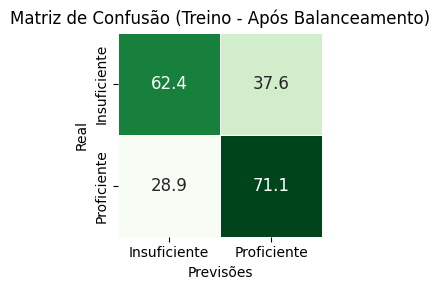


Acurácia no teste: 0.6400

Classification Report (Teste):
              precision    recall  f1-score   support

Insuficiente       0.91      0.62      0.74    250883
 Proficiente       0.29      0.72      0.41     53961

    accuracy                           0.64    304844
   macro avg       0.60      0.67      0.58    304844
weighted avg       0.80      0.64      0.68    304844



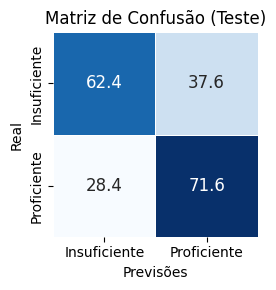

In [ ]:
# Função para plotar matriz de confusão normalizada por linha
def plot_confusion_matrix(y_true, y_pred, title, xticklabels, yticklabels, cmap, fig_size=(5, 3)):
    conf_matrix = confusion_matrix(y_true, y_pred, normalize='true') * 100  # Percentual por linha
    plt.figure(figsize=fig_size)
    sns.heatmap(conf_matrix, annot=True, fmt=".1f", cmap=cmap, cbar=False, square=True,
                annot_kws={"size": 12}, xticklabels=xticklabels, yticklabels=yticklabels, linewidths=0.5)
    plt.xlabel("Previsões")
    plt.ylabel("Real")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Avaliação no conjunto de treino (após balanceamento)
y_train_pred = (log_reg_stats.predict(X_train_undersample) > 0.5).astype(int)
train_accuracy = accuracy_score(y_train_undersample, y_train_pred)
print(f"\nAcurácia no treino (após balanceamento): {train_accuracy:.4f}")
print("\nClassification Report (Treino):")
print(classification_report(y_train_undersample, y_train_pred, target_names=['Insuficiente', 'Proficiente']))

# Plot da matriz de confusão para treino
plot_confusion_matrix(y_train_undersample, y_train_pred,
                      title="Matriz de Confusão (Treino - Após Balanceamento)",
                      xticklabels=['Insuficiente', 'Proficiente'],
                      yticklabels=['Insuficiente', 'Proficiente'],
                      cmap="Greens")

# Avaliação no conjunto de teste
y_test_pred = (log_reg_stats.predict(X_test) > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nAcurácia no teste: {test_accuracy:.4f}")
print("\nClassification Report (Teste):")
print(classification_report(y_test, y_test_pred, target_names=['Insuficiente', 'Proficiente']))

# Plot da matriz de confusão para teste
plot_confusion_matrix(y_test, y_test_pred,
                      title="Matriz de Confusão (Teste)",
                      xticklabels=['Insuficiente', 'Proficiente'],
                      yticklabels=['Insuficiente', 'Proficiente'],
                      cmap="Blues")


## **4 Regressão Logística - oversampling - Statsmodels**

In [ ]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Supondo que df_filtered já esteja carregado
# Criar variáveis dummies para as colunas categóricas
X = pd.get_dummies(df_filtered[['TX_RESP_Q18', 'TX_RESP_Q02', 'TX_RESP_Q07', 'TX_RESP_Q20e', 'TX_RESP_Q08',
                                'NU_TIPO_NIVEL_INSE', 'TX_RESP_Q04', 'ID_REGIAO', 'TX_RESP_Q01', 'TX_RESP_Q10b',
                                'TX_RESP_Q20a', 'TX_RESP_Q19', 'TX_RESP_Q10a', 'TX_RESP_Q14', 'ID_LOCALIZACAO']], drop_first=True)

X = sm.add_constant(X)

# Garantindo que as variáveis sejam do tipo inteiro
X = X.astype(int)


# Codificar a variável de saída PROFICIENCIA_DESCRICAO usando map
y = df_filtered['PROFICIENCIA_DESCRICAO'].map({'Insuficiente': 0, 'Proficiente': 1})
y = y.astype(int)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE nos dados de treino
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Treinar o modelo de regressão logística com SMOTE
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Matriz de Confusão normalizada
conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')
conf_matrix_percentage = np.round(conf_matrix * 100, 2)
classes = ['Insuficiente', 'Proficiente']
print("\nMatriz de Confusão (normalizada em %):\n")
print(pd.DataFrame(conf_matrix_percentage, index=classes, columns=classes))


# Extração de odds ratio e valores-p usando statsmodels
# Adicionar uma constante para o modelo
X_train_resampled_const = sm.add_constant(X_train_resampled)

# Ajustar o modelo com statsmodels
logit_model = sm.Logit(y_train_resampled, X_train_resampled_const)
result = logit_model.fit()

# Resumo do modelo (contém odds ratio e valores-p)
print(result.summary())

# Criar tabela de odds ratio, IC 95% e valores-p
odds_ratios = np.exp(result.params)  # Odds ratio
conf = np.exp(result.conf_int())  # Intervalo de confiança 95%
conf.columns = ['2.5%', '97.5%']
p_values = result.pvalues  # Valores-p

# Combinar tudo em uma tabela
summary_table = pd.concat([odds_ratios, conf, p_values], axis=1)
summary_table.columns = ['Odds Ratio', 'IC 2.5%', 'IC 97.5%', 'p-value']

# Exibir a tabela
print("\nTabela com Odds Ratio e Valores-p:\n")
print(summary_table)

# Exportar a tabela para CSV (opcional)
summary_table.to_csv("odds_ratios_e_valores_p.csv", index=True)


Acurácia: 0.6500505176418102

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.89      0.65      0.75    250883
           1       0.28      0.64      0.39     53961

    accuracy                           0.65    304844
   macro avg       0.59      0.65      0.57    304844
weighted avg       0.79      0.65      0.69    304844


Matriz de Confusão (normalizada em %):

              Insuficiente  Proficiente
Insuficiente         65.15        34.85
Proficiente          35.65        64.35
Optimization terminated successfully.
         Current function value: 0.569531
         Iterations 7
                             Logit Regression Results                             
Dep. Variable:     PROFICIENCIA_DESCRICAO   No. Observations:              2008110
Model:                              Logit   Df Residuals:                  2008060
Method:                               MLE   Df Model:                           49
Date:              

In [ ]:
# Exibindo a quantidade e porcentagem das classes antes do balanceamento
print("Distribuição das classes antes do balanceamento:")
print(y_train.value_counts())
print("\nPorcentagem das classes antes do balanceamento:")
print(y_train.value_counts(normalize=True) * 100)

# Exibindo a quantidade e porcentagem das classes após o balanceamento
print("\nDistribuição das classes após o balanceamento com SMOTE:")
print(y_train_resampled.value_counts())
print("\nPorcentagem das classes após o balanceamento com SMOTE:")
print(y_train_resampled.value_counts(normalize=True) * 100)


Distribuição das classes antes do balanceamento:
PROFICIENCIA_DESCRICAO
0    1004055
1     215318
Name: count, dtype: int64

Porcentagem das classes antes do balanceamento:
PROFICIENCIA_DESCRICAO
0    82.341909
1    17.658091
Name: proportion, dtype: float64

Distribuição das classes após o balanceamento com SMOTE:
PROFICIENCIA_DESCRICAO
0    1004055
1    1004055
Name: count, dtype: int64

Porcentagem das classes após o balanceamento com SMOTE:
PROFICIENCIA_DESCRICAO
0    50.0
1    50.0
Name: proportion, dtype: float64


##  Regressão Logística Oversampling - Testes Hiperparametros

In [ ]:
import pandas as pd

# Definindo os parâmetros e intervalos ajustados com o GridSearch
parametros_gridsearch = {
    "Modelo": ["Regressão Logística", "Random Forest"],
    "Parâmetro": [
        "C (inverso da regularização)",
        "n_estimators (número de árvores), max_depth (profundidade máxima)"
    ],
    "Intervalo/Ajustes": [
        "[0.01, 0.1, 1, 10, 100]",
        "{'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}"
    ]
}

# Criando a tabela
df_parametros = pd.DataFrame(parametros_gridsearch)

# Exibindo a tabela
print("Parâmetros ajustados e intervalos explorados no GridSearch:")
print(df_parametros.to_markdown(index=False))


Parâmetros ajustados e intervalos explorados no GridSearch:
| Modelo              | Parâmetro                                                         | Intervalo/Ajustes                                          |
|:--------------------|:------------------------------------------------------------------|:-----------------------------------------------------------|
| Regressão Logística | C (inverso da regularização)                                      | [0.01, 0.1, 1, 10, 100]                                    |
| Random Forest       | n_estimators (número de árvores), max_depth (profundidade máxima) | {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]} |


Melhores parâmetros Regressão Logística: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Melhores parâmetros Random Forest: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}

Classification Report - Regressão Logística:
              precision    recall  f1-score   support

Insuficiente       0.83      0.99      0.90    250883
 Proficiente       0.51      0.03      0.07     53961

    accuracy                           0.82    304844
   macro avg       0.67      0.51      0.48    304844
weighted avg       0.77      0.82      0.75    304844



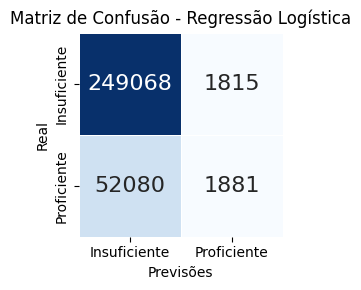


Classification Report - Random Forest:
              precision    recall  f1-score   support

Insuficiente       0.82      1.00      0.90    250883
 Proficiente       0.00      0.00      0.00     53961

    accuracy                           0.82    304844
   macro avg       0.41      0.50      0.45    304844
weighted avg       0.68      0.82      0.74    304844



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


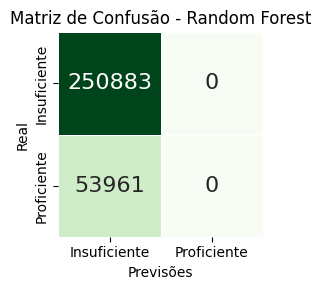

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Configurando os dados de entrada
X = pd.get_dummies(df_filtered.drop(columns=['PROFICIENCIA_DESCRICAO']), drop_first=True)
y = df_filtered['PROFICIENCIA_DESCRICAO'].map({'Insuficiente': 0, 'Proficiente': 1})

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. GridSearch para Regressão Logística
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}
logreg = LogisticRegression(random_state=42)
grid_search_logreg = GridSearchCV(logreg, param_grid_logreg, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)

# Melhor modelo e parâmetros para Regressão Logística
best_logreg = grid_search_logreg.best_estimator_
print("Melhores parâmetros Regressão Logística:", grid_search_logreg.best_params_)

# 2. GridSearch para Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Melhor modelo e parâmetros para Random Forest
best_rf = grid_search_rf.best_estimator_
print("Melhores parâmetros Random Forest:", grid_search_rf.best_params_)

# Avaliação do melhor modelo de Regressão Logística
y_pred_logreg = best_logreg.predict(X_test)
print("\nClassification Report - Regressão Logística:")
print(classification_report(y_test, y_pred_logreg, target_names=['Insuficiente', 'Proficiente']))

# Matriz de confusão para Regressão Logística
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_logreg, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            annot_kws={"size": 16}, xticklabels=['Insuficiente', 'Proficiente'],
            yticklabels=['Insuficiente', 'Proficiente'], linewidths=0.5)
plt.xlabel("Previsões")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Regressão Logística")
plt.tight_layout()
plt.show()

# Avaliação do melhor modelo de Random Forest
y_pred_rf = best_rf.predict(X_test)
print("\nClassification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=['Insuficiente', 'Proficiente']))

# Matriz de confusão para Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", cbar=False, square=True,
            annot_kws={"size": 16}, xticklabels=['Insuficiente', 'Proficiente'],
            yticklabels=['Insuficiente', 'Proficiente'], linewidths=0.5)
plt.xlabel("Previsões")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.tight_layout()
plt.show()

Melhores parâmetros Random Forest: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}

Tabela de Parâmetros Ajustados:
                Modelo                                         Parâmetros
0  Regressão Logística  C: [0.1, 1, 10], penalty: ['l2'], solver: ['li...
1        Random Forest  n_estimators: [50, 100], max_depth: [5, 10], m...

Classification Report - Regressão Logística:
              precision    recall  f1-score   support

Insuficiente       0.83      0.99      0.90    250883
 Proficiente       0.51      0.03      0.07     53961

    accuracy                           0.82    304844
   macro avg       0.67      0.51      0.48    304844
weighted avg       0.77      0.82      0.75    304844



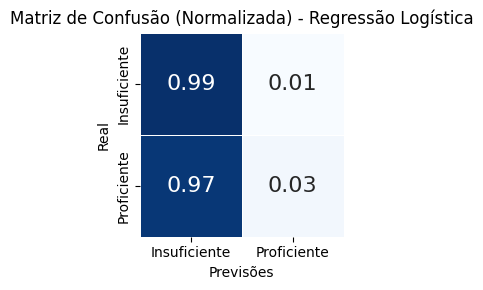


Classification Report - Random Forest:
              precision    recall  f1-score   support

Insuficiente       0.82      1.00      0.90    250883
 Proficiente       0.00      0.00      0.00     53961

    accuracy                           0.82    304844
   macro avg       0.41      0.50      0.45    304844
weighted avg       0.68      0.82      0.74    304844



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


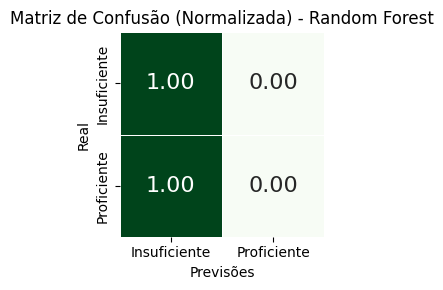

In [ ]:
best_rf = grid_search_rf.best_estimator_
print("Melhores parâmetros Random Forest:", grid_search_rf.best_params_)

# Tabela com parâmetros ajustados
param_table = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'Random Forest'],
    'Parâmetros': [
        f"C: {param_grid_logreg['C']}, penalty: {param_grid_logreg['penalty']}, solver: {param_grid_logreg['solver']}",
        f"n_estimators: {param_grid_rf['n_estimators']}, max_depth: {param_grid_rf['max_depth']}, min_samples_split: {param_grid_rf['min_samples_split']}"
    ]
})

print("\nTabela de Parâmetros Ajustados:")
print(param_table)

# Avaliação do melhor modelo de Regressão Logística
y_pred_logreg = best_logreg.predict(X_test)
print("\nClassification Report - Regressão Logística:")
print(classification_report(y_test, y_pred_logreg, target_names=['Insuficiente', 'Proficiente']))

# Matriz de confusão para Regressão Logística (normalizada)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg, normalize='true')
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_logreg, annot=True, fmt=".2f", cmap="Blues", cbar=False, square=True,
            annot_kws={"size": 16}, xticklabels=['Insuficiente', 'Proficiente'],
            yticklabels=['Insuficiente', 'Proficiente'], linewidths=0.5)
plt.xlabel("Previsões")
plt.ylabel("Real")
plt.title("Matriz de Confusão (Normalizada) - Regressão Logística")
plt.tight_layout()
plt.show()

# Avaliação do melhor modelo de Random Forest
y_pred_rf = best_rf.predict(X_test)
print("\nClassification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=['Insuficiente', 'Proficiente']))

# Matriz de confusão para Random Forest (normalizada)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf, normalize='true')
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_rf, annot=True, fmt=".2f", cmap="Greens", cbar=False, square=True,
            annot_kws={"size": 16}, xticklabels=['Insuficiente', 'Proficiente'],
            yticklabels=['Insuficiente', 'Proficiente'], linewidths=0.5)
plt.xlabel("Previsões")
plt.ylabel("Real")
plt.title("Matriz de Confusão (Normalizada) - Random Forest")
plt.tight_layout()
plt.show()



Classification Report - Random Forest:
              precision    recall  f1-score   support

Insuficiente       0.82      1.00      0.90    250883
 Proficiente       0.60      0.01      0.01     53961

    accuracy                           0.82    304844
   macro avg       0.71      0.50      0.46    304844
weighted avg       0.78      0.82      0.75    304844



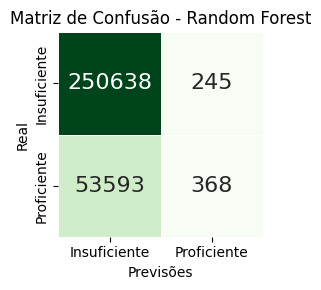

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Configurando os dados de entrada
X = pd.get_dummies(df_filtered.drop(columns=['PROFICIENCIA_DESCRICAO']), drop_first=True)
y = df_filtered['PROFICIENCIA_DESCRICAO'].map({'Insuficiente': 0, 'Proficiente': 1})

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo Random Forest com parâmetros fixos
rf = RandomForestClassifier(
    n_estimators=200,   # Número de árvores
    max_depth=15,       # Profundidade máxima
    min_samples_split=5,  # Mínimo de amostras para divisão
    random_state=42
)
rf.fit(X_train, y_train)

# Previsões com o modelo treinado
y_pred_rf = rf.predict(X_test)

# Avaliação do modelo Random Forest
print("\nClassification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=['Insuficiente', 'Proficiente']))

# Matriz de confusão para Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", cbar=False, square=True,
            annot_kws={"size": 16}, xticklabels=['Insuficiente', 'Proficiente'],
            yticklabels=['Insuficiente', 'Proficiente'], linewidths=0.5)
plt.xlabel("Previsões")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.tight_layout()
plt.show()



Classification Report - Random Forest:
              precision    recall  f1-score   support

Insuficiente       0.82      1.00      0.90    250883
 Proficiente       0.60      0.01      0.01     53961

    accuracy                           0.82    304844
   macro avg       0.71      0.50      0.46    304844
weighted avg       0.78      0.82      0.75    304844



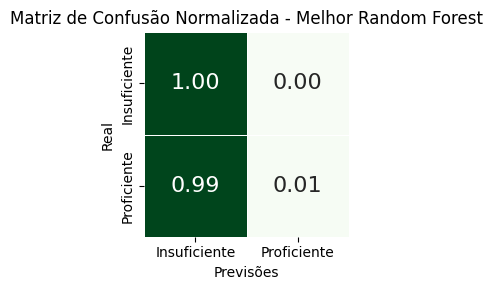

In [34]:



# Avaliação do modelo com os melhores parâmetros
print("\nClassification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=['Insuficiente', 'Proficiente']))

# Matriz de confusão normalizada
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf, normalize='true')
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_rf, annot=True, fmt=".2f", cmap="Greens", cbar=False, square=True,
            annot_kws={"size": 16}, xticklabels=['Insuficiente', 'Proficiente'],
            yticklabels=['Insuficiente', 'Proficiente'], linewidths=0.5)
plt.xlabel("Previsões")
plt.ylabel("Real")
plt.title("Matriz de Confusão Normalizada - Melhor Random Forest")
plt.tight_layout()
plt.show()

In [ ]:
# Comparação das maiores odds da Regressão Logística com as top features do Random Forest
# Extraindo odds da Regressão Logística
logreg_odds = pd.DataFrame({
    'Feature': X_train.columns,
    'Odds': np.exp(best_logreg.coef_).flatten()
}).sort_values(by='Odds', ascending=False).head(20)

print("\nTop 20 maiores Odds - Regressão Logística:")
print(logreg_odds)

# Extraindo importâncias do Random Forest
rf_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False).head(20)

print("\nTop 20 Features mais importantes - Random Forest:")
print(rf_importances)

# Tabela comparativa
comparison_table = pd.merge(logreg_odds, rf_importances, on='Feature', how='outer')
comparison_table = comparison_table.fillna('-')
print("\nComparação entre Regressão Logística e Random Forest:")
print(comparison_table)


Top 20 maiores Odds - Regressão Logística:
                 Feature      Odds
16        TX_RESP_Q20e_D  3.843194
15        TX_RESP_Q20e_C  2.997942
39        TX_RESP_Q20a_D  1.793253
38        TX_RESP_Q20a_C  1.696498
14        TX_RESP_Q20e_B  1.688871
28  NU_TIPO_NIVEL_INSE_7  1.500968
29  NU_TIPO_NIVEL_INSE_8  1.498614
12         TX_RESP_Q07_E  1.452369
44         TX_RESP_Q14_C  1.421874
27  NU_TIPO_NIVEL_INSE_6  1.386237
47         TX_RESP_Q14_F  1.360128
36        TX_RESP_Q10b_B  1.313500
46         TX_RESP_Q14_E  1.297988
11         TX_RESP_Q07_D  1.296313
37        TX_RESP_Q20a_B  1.288027
20         TX_RESP_Q08_E  1.273284
48         TX_RESP_Q14_G  1.229024
26  NU_TIPO_NIVEL_INSE_5  1.222295
22  NU_TIPO_NIVEL_INSE_1  1.193466
45         TX_RESP_Q14_D  1.184287

Top 20 Features mais importantes - Random Forest:
                 Feature  Importance
2          TX_RESP_Q18_B    0.149146
16        TX_RESP_Q20e_D    0.143429
12         TX_RESP_Q07_E    0.093409
28  NU_TIPO_NIVEL_INSE

## PCA

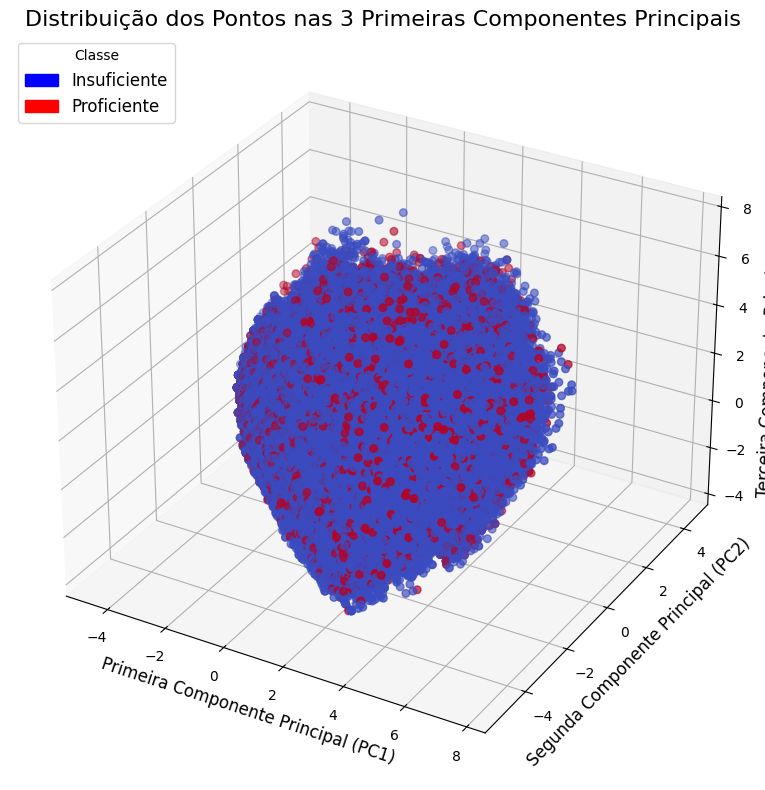


Variância explicada pelas três primeiras componentes principais: [0.06100145 0.0432985  0.03873201]
Variância explicada total (PC1 + PC2 + PC3): 0.1430


In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

# Selecionando as variáveis preditoras (excluindo 'PROFICIENCIA_DESCRICAO' e outras variáveis não preditoras)
predictor_columns = ['TX_RESP_Q18', 'TX_RESP_Q02', 'TX_RESP_Q07', 'TX_RESP_Q20e', 'TX_RESP_Q08',
                     'NU_TIPO_NIVEL_INSE', 'TX_RESP_Q04', 'ID_REGIAO', 'TX_RESP_Q01',
                     'TX_RESP_Q10b', 'TX_RESP_Q20a', 'TX_RESP_Q19', 'TX_RESP_Q10a',
                     'TX_RESP_Q14', 'ID_LOCALIZACAO']

# Preparando os dados
X = df_filtered[predictor_columns]
y = df_filtered['PROFICIENCIA_DESCRICAO'].map({'Insuficiente': 0, 'Proficiente': 1})  # Variável resposta

# Codificando variáveis categóricas com pd.get_dummies (one-hot encoding)
X_encoded = pd.get_dummies(X, drop_first=True)

# Normalizando as variáveis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Aplicando PCA para reduzir para 3 componentes principais
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Criando um DataFrame com as componentes principais e a classe
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Classe'] = y

# Visualização 3D com "cubo" transparente
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotando os pontos no gráfico 3D e especificando as cores manualmente
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Classe'], cmap=plt.cm.coolwarm, s=30)  # Tamanho dos pontos reduzido

# Adicionando título e rótulos
ax.set_title('Distribuição dos Pontos nas 3 Primeiras Componentes Principais', fontsize=16)
ax.set_xlabel('Primeira Componente Principal (PC1)', fontsize=12)
ax.set_ylabel('Segunda Componente Principal (PC2)', fontsize=12)
ax.set_zlabel('Terceira Componente Principal (PC3)', fontsize=12)

# Criando uma legenda manualmente para mostrar ambas as classes com cores corretas
legend1 = mpatches.Patch(color='blue', label='Insuficiente')
legend2 = mpatches.Patch(color='red', label='Proficiente')
ax.legend(handles=[legend1, legend2], title="Classe", loc='upper left', fontsize=12)

# Ajustando o "cubo" (limites dos eixos)
ax.set_xlim([pca_df['PC1'].min() - 1, pca_df['PC1'].max() + 1])
ax.set_ylim([pca_df['PC2'].min() - 1, pca_df['PC2'].max() + 1])
ax.set_zlim([pca_df['PC3'].min() - 1, pca_df['PC3'].max() + 1])

# Exibindo a visualização
plt.tight_layout()
plt.show()

# Opcional: Visualizando a variância explicada pelas três primeiras componentes
explained_variance = pca.explained_variance_ratio_
print(f"\nVariância explicada pelas três primeiras componentes principais: {explained_variance}")
print(f"Variância explicada total (PC1 + PC2 + PC3): {explained_variance.sum():.4f}")


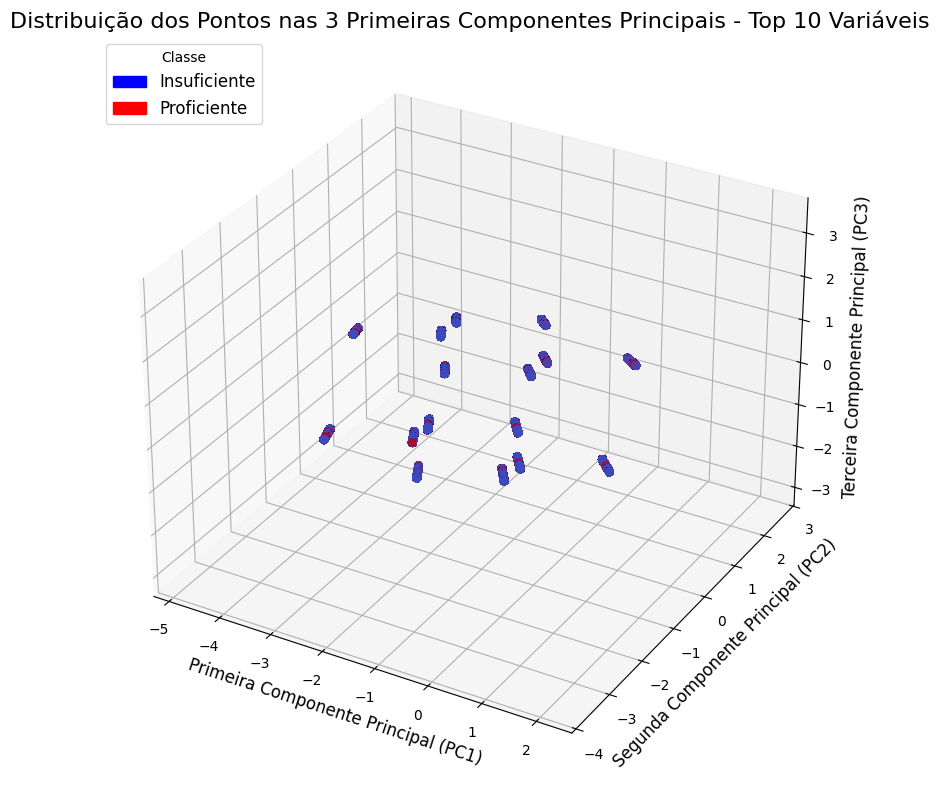


Variância explicada pelas três primeiras componentes principais: [0.32079687 0.21942352 0.17900188]
Variância explicada total (PC1 + PC2 + PC3): 0.7192


In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
from sklearn.ensemble import RandomForestClassifier

# Selecionando as variáveis preditoras (excluindo 'PROFICIENCIA_DESCRICAO' e outras variáveis não preditoras)
predictor_columns = ['TX_RESP_Q18', 'TX_RESP_Q02', 'TX_RESP_Q07', 'TX_RESP_Q20e', 'TX_RESP_Q08',
                     'NU_TIPO_NIVEL_INSE', 'TX_RESP_Q04', 'ID_REGIAO', 'TX_RESP_Q01',
                     'TX_RESP_Q10b', 'TX_RESP_Q20a', 'TX_RESP_Q19', 'TX_RESP_Q10a',
                     'TX_RESP_Q14', 'ID_LOCALIZACAO']

# Preparando os dados
X = df_filtered[predictor_columns]
y = df_filtered['PROFICIENCIA_DESCRICAO'].map({'Insuficiente': 0, 'Proficiente': 1})  # Variável resposta

# Codificando variáveis categóricas com pd.get_dummies (one-hot encoding)
X_encoded = pd.get_dummies(X, drop_first=True)

# Ajustando o modelo Random Forest para obter a importância das variáveis
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_encoded, y)

# Obtendo a importância das variáveis
feature_importances = rf_model.feature_importances_

# Criando um DataFrame para as importâncias das variáveis
importance_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': feature_importances
})

# Selecionando as top 10 variáveis mais importantes
top_10_features = importance_df.sort_values(by='Importance', ascending=False).head(5)['Feature']

# Selecionando os dados apenas com as top 10 variáveis
X_top10 = X_encoded[top_10_features]

# Normalizando as variáveis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top10)

# Aplicando PCA para reduzir para 3 componentes principais
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Criando um DataFrame com as componentes principais e a classe
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Classe'] = y

# Visualização 3D com "cubo" transparente
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotando os pontos no gráfico 3D e especificando as cores manualmente
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Classe'], cmap=plt.cm.coolwarm, s=30)  # Tamanho dos pontos reduzido

# Adicionando título e rótulos
ax.set_title('Distribuição dos Pontos nas 3 Primeiras Componentes Principais - Top 10 Variáveis', fontsize=16)
ax.set_xlabel('Primeira Componente Principal (PC1)', fontsize=12)
ax.set_ylabel('Segunda Componente Principal (PC2)', fontsize=12)
ax.set_zlabel('Terceira Componente Principal (PC3)', fontsize=12)

# Criando uma legenda manualmente para mostrar ambas as classes com cores corretas
legend1 = mpatches.Patch(color='blue', label='Insuficiente')
legend2 = mpatches.Patch(color='red', label='Proficiente')
ax.legend(handles=[legend1, legend2], title="Classe", loc='upper left', fontsize=12)

# Ajustando o "cubo" (limites dos eixos)
ax.set_xlim([pca_df['PC1'].min() - 1, pca_df['PC1'].max() + 1])
ax.set_ylim([pca_df['PC2'].min() - 1, pca_df['PC2'].max() + 1])
ax.set_zlim([pca_df['PC3'].min() - 1, pca_df['PC3'].max() + 1])

# Exibindo a visualização
plt.tight_layout()
plt.show()

# Opcional: Visualizando a variância explicada pelas três primeiras componentes
explained_variance = pca.explained_variance_ratio_
print(f"\nVariância explicada pelas três primeiras componentes principais: {explained_variance}")
print(f"Variância explicada total (PC1 + PC2 + PC3): {explained_variance.sum():.4f}")


##Boxplots

<ipython-input-37-9190848628b5>:35: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df[coluna].dtype == 'object' or pd.api.types.is_categorical_dtype(df[coluna]):
<ipython-input-37-9190848628b5>:35: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df[coluna].dtype == 'object' or pd.api.types.is_categorical_dtype(df[coluna]):
<ipython-input-37-9190848628b5>:35: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df[coluna].dtype == 'object' or pd.api.types.is_categorical_dtype(df[coluna]):


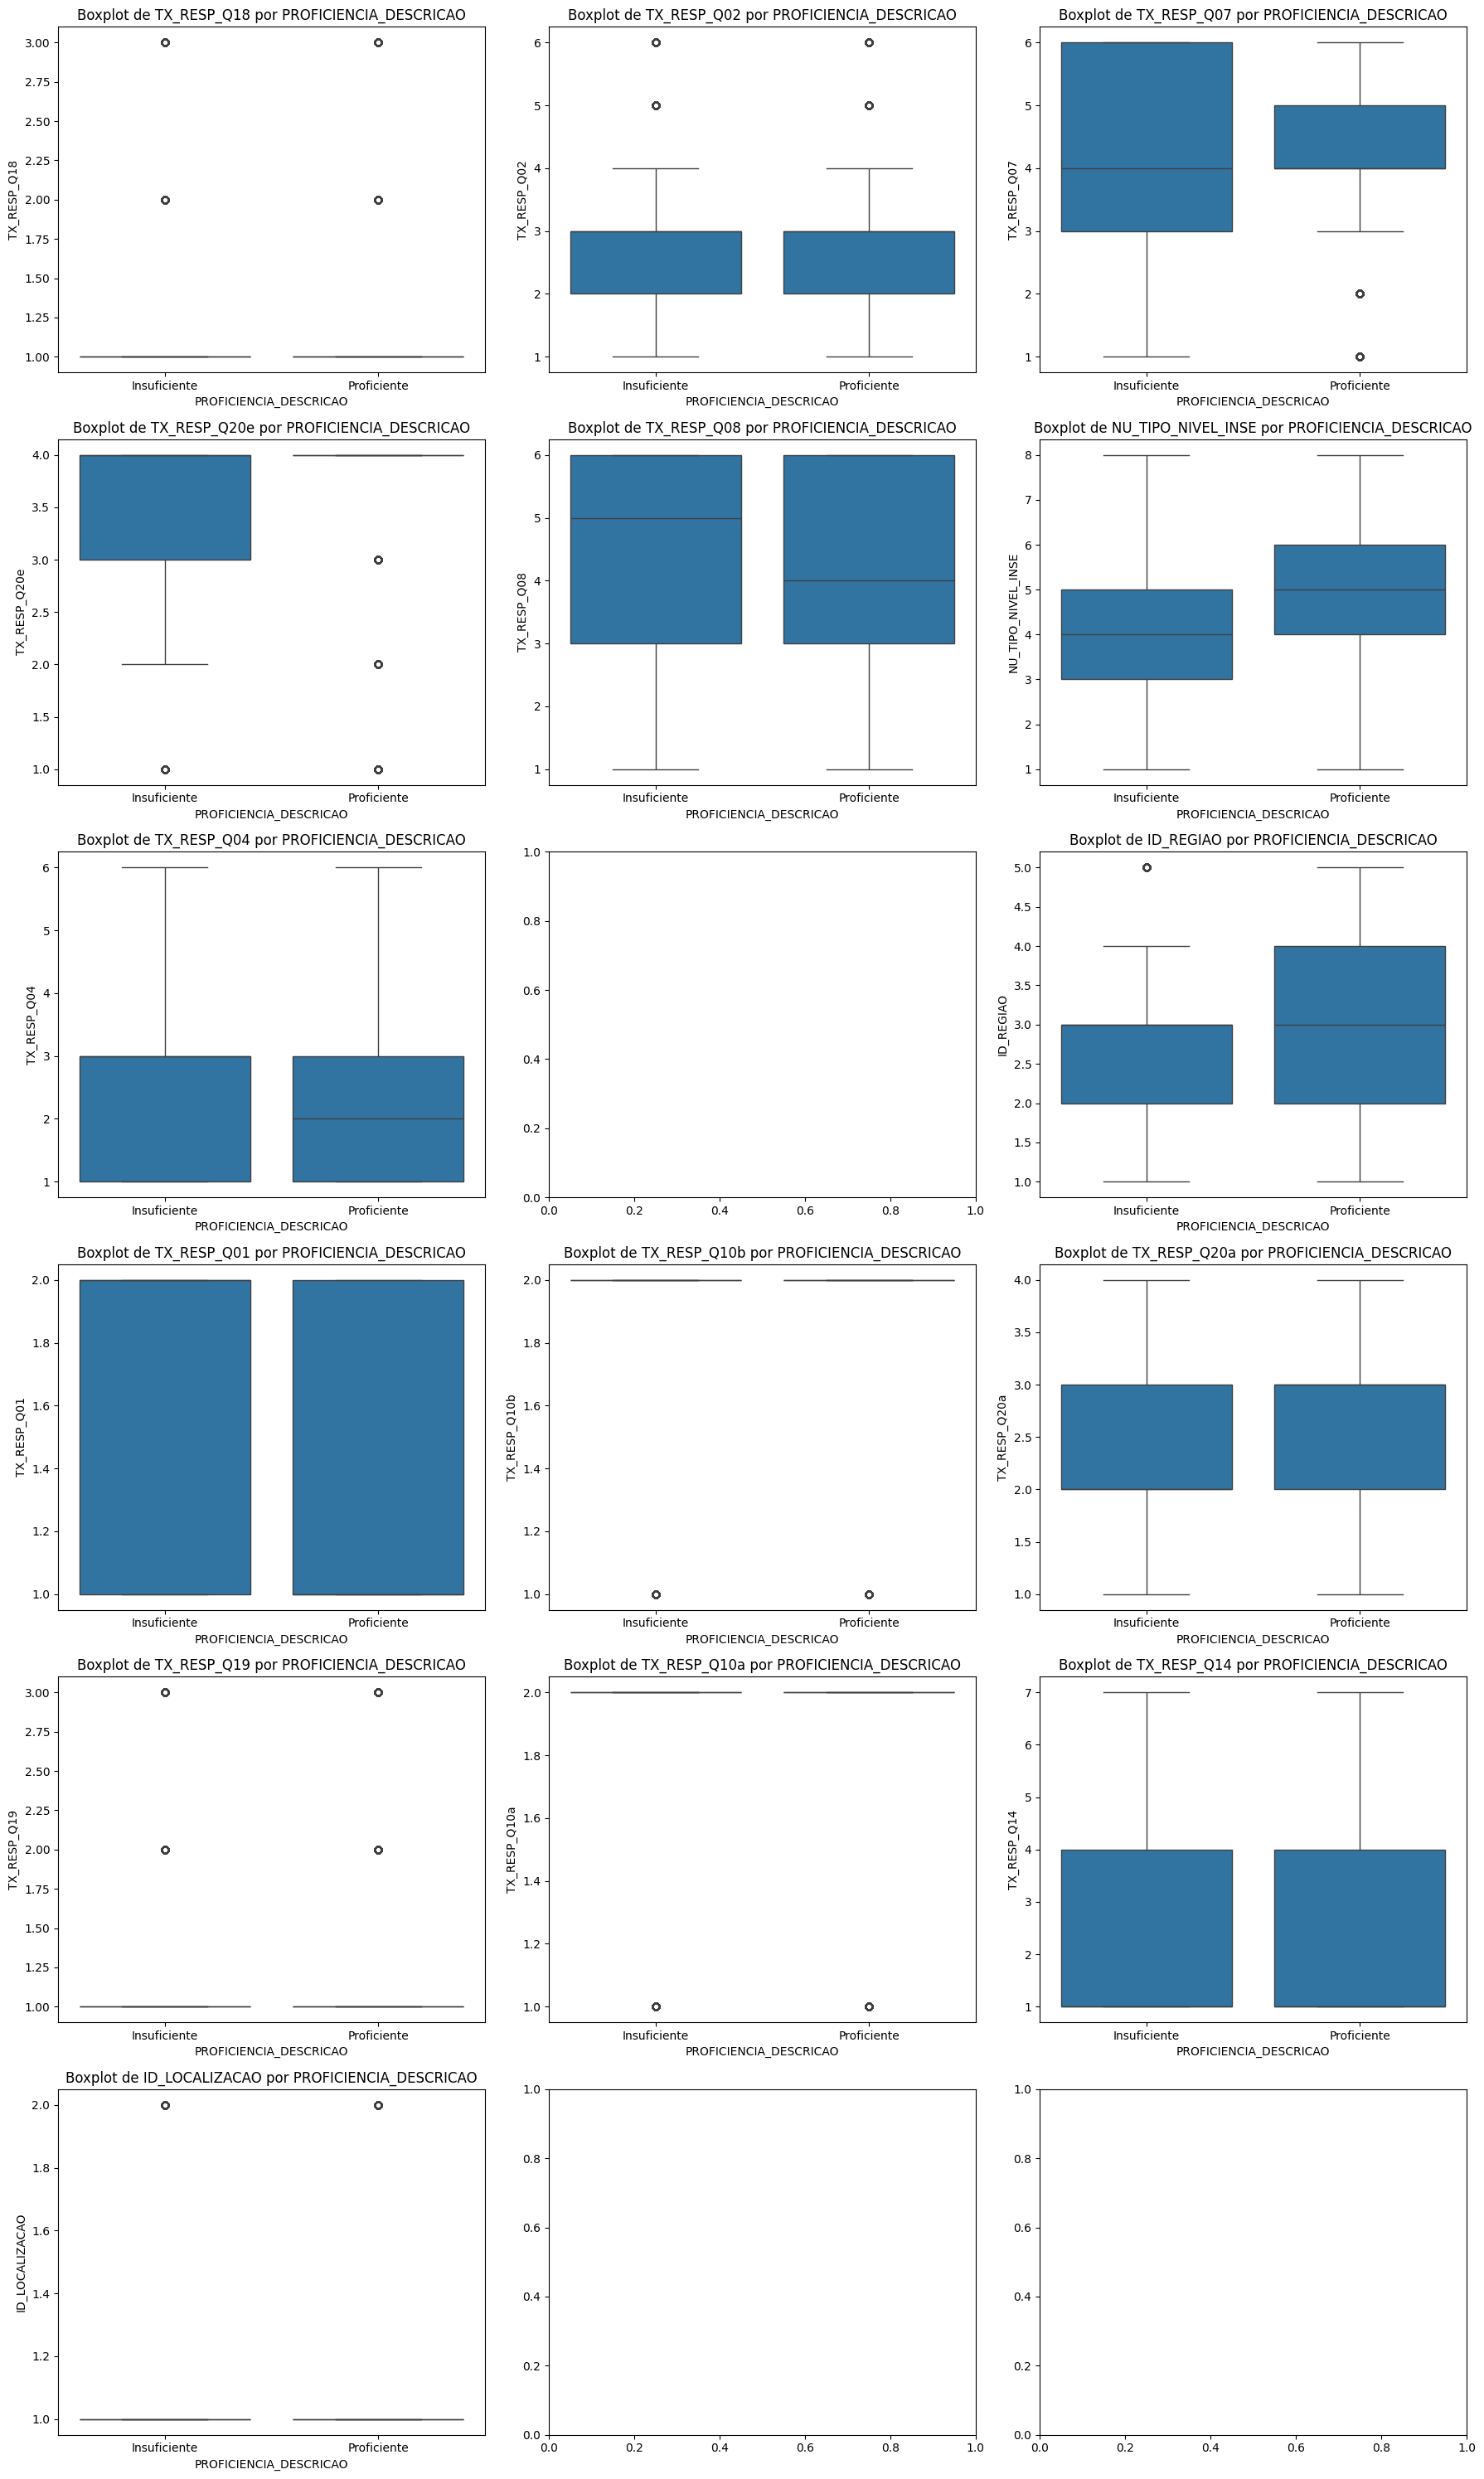

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que df_filtered seja seu DataFrame
colunas_selecionadas = ['TX_RESP_Q18', 'TX_RESP_Q02', 'TX_RESP_Q07', 'TX_RESP_Q20e', 'TX_RESP_Q08',
                        'NU_TIPO_NIVEL_INSE', 'TX_RESP_Q04', 'PROFICIENCIA_DESCRICAO', 'ID_REGIAO',
                        'TX_RESP_Q01', 'TX_RESP_Q10b', 'TX_RESP_Q20a', 'TX_RESP_Q19', 'TX_RESP_Q10a',
                        'TX_RESP_Q14', 'ID_LOCALIZACAO']

# Filtrando as colunas
df = df_filtered[colunas_selecionadas]

# Convertendo a coluna 'NU_TIPO_NIVEL_INSE' para inteiro
df['NU_TIPO_NIVEL_INSE'] = pd.to_numeric(df['NU_TIPO_NIVEL_INSE'], errors='coerce').astype('Int64')

# Dicionário para mapear alternativas A, B, C, D para valores numéricos
alternativas_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5,'F': 6, 'G': 7}  # Ajuste conforme as alternativas que você tiver

# Ajustando o número de gráficos por linha
num_graficos_por_linha = 3
num_colunas = 1
num_linhas = (len(colunas_selecionadas) - 1) // num_graficos_por_linha + 1  # Ajuste para 3 gráficos por linha

# Criando a grade de subgráficos
fig, axes = plt.subplots(num_linhas, num_graficos_por_linha, figsize=(18, num_linhas * 5))

# Flattening the axes array to make it easier to iterate over
axes = axes.flatten()

# Iterando pelas colunas preditoras
for i, coluna in enumerate(colunas_selecionadas):
    if coluna != 'PROFICIENCIA_DESCRICAO':  # Ignorar a variável resposta
        # Verificando se a coluna contém alternativas categóricas (A, B, C, D, ...)
        if df[coluna].dtype == 'object' or pd.api.types.is_categorical_dtype(df[coluna]):
            # Mapeando as alternativas para valores numéricos
            df[coluna] = df[coluna].map(alternativas_map)

            # Criando o boxplot para cada pergunta categórica, separando por PROFICIENCIA_DESCRICAO
        sns.boxplot(x='PROFICIENCIA_DESCRICAO', y=coluna, data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot de {coluna} por PROFICIENCIA_DESCRICAO')

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()
plt.show()
